In [8]:
!date

Wed May 28 09:49:38 AM EDT 2025


In [9]:
pwd

'/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code'

In [10]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import ants
import pickle
from tqdm import tqdm
import seaborn as sns

In [11]:
indir = '../Data/StudyForrest/ensembles_last_CVAE/'
analysis_name = 'DeepCor-ABCD-v6'
analysis_dir = os.path.join(indir,analysis_name)
analysis_dir

'../Data/StudyForrest/ensembles_last_CVAE/DeepCor-ABCD-v6'

In [12]:
def run_done_check(fn_temp = 'signal_contrast_face_S{s}_R{r}.nii.gz'):
    done_check = np.zeros((34,2))
    for s in range(34):
        for r in [1,2]:
            fn = os.path.join(analysis_dir,fn_temp.format(s=s,r=r))
            done_check[s,r-1] = os.path.exists(fn)*1.0

    plt.figure(figsize=(25,3))
    sns.heatmap(done_check.transpose(),annot=True,cbar=False)
    plt.title(fn_temp+f' | N={done_check.sum()}',fontsize=16,fontweight='bold')

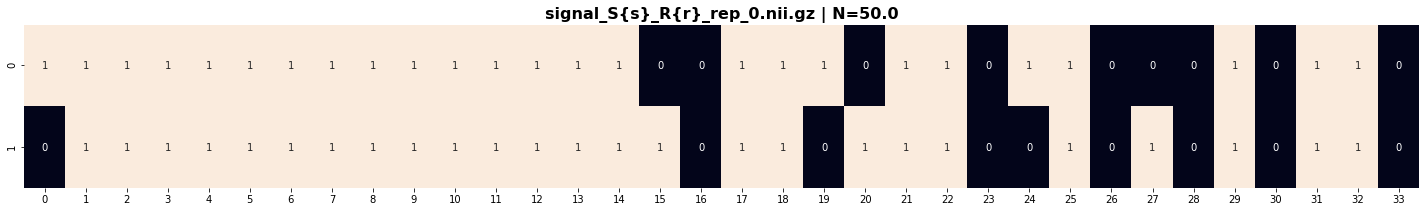

In [13]:
run_done_check('signal_S{s}_R{r}_rep_0.nii.gz')

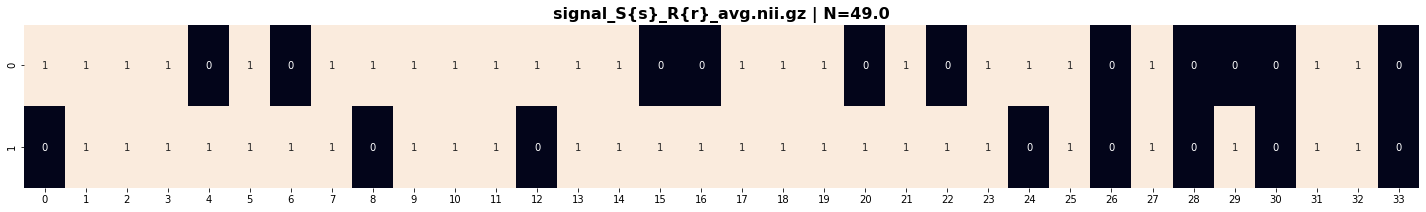

In [14]:
run_done_check('signal_S{s}_R{r}_avg.nii.gz')

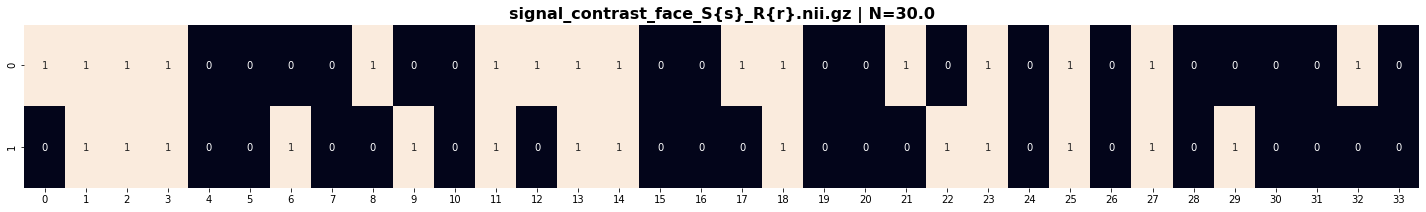

In [15]:
run_done_check('signal_contrast_face_S{s}_R{r}.nii.gz')

In [ ]:
#temp = ants.image_read(os.path.join(analysis_dir,'signal_contrast_face_S{s}_R{r}.nii.gz'.format(s=0,r=1)))

In [34]:
def get_grand_avg(fn_temp):
    ims = []
    for s in tqdm(range(34)):
        for r in [1,2]:
            #fn = os.path.join(analysis_dir,'signal_contrast_face_S{s}_R{r}.nii.gz'.format(s=s,r=r))
            fn = fn_temp.format(s=s,r=r)
            if os.path.exists(fn):
                ims.append(ants.image_read(fn))
    avg = ims[0].new_image_like(np.array([im.numpy() for im in ims]).mean(axis=0))
    return avg

In [56]:
get_grand_avg(os.path.join(analysis_dir,'preproc_corr2face_S{s}_R{r}.nii.gz')).to_filename(os.path.join(analysis_dir,'preproc_corr2face_GrandAvg.nii.gz'))
get_grand_avg(os.path.join(analysis_dir,'compcor_corr2face_S{s}_R{r}.nii.gz')).to_filename(os.path.join(analysis_dir,'compcor_corr2face_GrandAvg.nii.gz'))
get_grand_avg(os.path.join(analysis_dir,'signal_corr2face_S{s}_R{r}.nii.gz')).to_filename(os.path.join(analysis_dir,'signal_corr2face_GrandAvg.nii.gz'))

100%|██████████| 34/34 [00:00<00:00, 48.09it/s]


In [57]:
get_grand_avg(os.path.join(analysis_dir,'preproc_corr2place_S{s}_R{r}.nii.gz')).to_filename(os.path.join(analysis_dir,'preproc_corr2place_GrandAvg.nii.gz'))
get_grand_avg(os.path.join(analysis_dir,'compcor_corr2place_S{s}_R{r}.nii.gz')).to_filename(os.path.join(analysis_dir,'compcor_corr2place_GrandAvg.nii.gz'))
get_grand_avg(os.path.join(analysis_dir,'signal_corr2place_S{s}_R{r}.nii.gz')).to_filename(os.path.join(analysis_dir,'signal_corr2place_GrandAvg.nii.gz'))

100%|██████████| 34/34 [00:00<00:00, 47.89it/s]


In [58]:
get_grand_avg(os.path.join(analysis_dir,'preproc_contrast_face_S{s}_R{r}.nii.gz')).to_filename(os.path.join(analysis_dir,'preproc_contrast_face_GrandAvg.nii.gz'))
get_grand_avg(os.path.join(analysis_dir,'compcor_contrast_face_S{s}_R{r}.nii.gz')).to_filename(os.path.join(analysis_dir,'compcor_contrast_face_GrandAvg.nii.gz'))
get_grand_avg(os.path.join(analysis_dir,'signal_contrast_face_S{s}_R{r}.nii.gz')).to_filename(os.path.join(analysis_dir,'signal_contrast_face_GrandAvg.nii.gz'))

100%|██████████| 34/34 [00:00<00:00, 79.06it/s]


In [59]:
get_grand_avg(os.path.join(analysis_dir,'preproc_contrast_place_S{s}_R{r}.nii.gz')).to_filename(os.path.join(analysis_dir,'preproc_contrast_place_GrandAvg.nii.gz'))
get_grand_avg(os.path.join(analysis_dir,'compcor_contrast_place_S{s}_R{r}.nii.gz')).to_filename(os.path.join(analysis_dir,'compcor_contrast_place_GrandAvg.nii.gz'))
get_grand_avg(os.path.join(analysis_dir,'signal_contrast_place_S{s}_R{r}.nii.gz')).to_filename(os.path.join(analysis_dir,'signal_contrast_place_GrandAvg.nii.gz'))

100%|██████████| 34/34 [00:00<00:00, 79.69it/s]


In [63]:
names = ['corr2face','corr2place','contrast_face','contrast_place']
for name in names:
    im1 = ants.image_read(os.path.join(analysis_dir,f'signal_{name}_GrandAvg.nii.gz'))
    im2 = ants.image_read(os.path.join(analysis_dir,f'preproc_{name}_GrandAvg.nii.gz'))
    (im1-im2).to_filename(os.path.join(analysis_dir,f'signal_over_preproc_{name}.nii.gz'))

    im1 = ants.image_read(os.path.join(analysis_dir,f'signal_{name}_GrandAvg.nii.gz'))
    im2 = ants.image_read(os.path.join(analysis_dir,f'compcor_{name}_GrandAvg.nii.gz'))
    (im1-im2).to_filename(os.path.join(analysis_dir,f'signal_over_compcor_{name}.nii.gz'))
    print(((im1-im2).numpy().min(),(im1-im2).numpy().max()))

(0.0, 0.0)
(0.0, 0.0)
(-5.094065, 2.794129)
(-2.794129, 5.094065)


(-2.794129, 5.094065)